# 👨‍🍳Beginner's SounderPy Cookbook

### A collection of simple SounderPy recipies for accessing and analyzing vertical profile data.

*******
<br>

- #### **Recipies in this cookbook:**

  1.   **Integrated data sources & how to load them**
  2.   **Plotting soundings**
  3.   **Plotting hodographs**
  4.   **Plotting composite soundings**

- #### **Time to learn**: 15 minutes

<br>

*(C) Kyle J Gillett, University of North Dakota, 2024*

<br>

**********************************

## **Before we get started...**

#### **Definitions**
  - Cookbook: *a collection of 'recipies'*
  - Recipe: *a set of steps that create a programmatic solution to a problem*
  - Tool: *SounderPy slang for a Python 'function' that completes a task; where a 'function' is the programmatic term for a block of reusable code that completes an operation*
  - Library: *a collection of pre-written, packaged code that users can install and use to perform specific tasks*
  - Workspace: *the medium by which we are writing code; in this case, a Jupyter Notebook*
  - Environment: *the set of rules, libraries, and packages, such as the code interpreter, that runs your code workspace*
  - Argument: *information that is passed into function*
  - Alias: *a naming shortcut to refer to a code library when its imported*

<br>

#### **Additional Resources**

- SounderPy documentation: https://kylejgillett.github.io/sounderpy/
- Unidata "Intro to Python" Training: https://unidata.github.io/python-training/python/intro-to-python/
- Unidata Python Workshop: https://unidata.github.io/python-training/workshop/workshop-intro/

<br>

#### **Pre-requisites**

SounderPy must be installed in your environment in order to import and access it's tools. This can be done easily with pip, conda, or mamba. Details are here: https://kylejgillett.github.io/sounderpy/about.html#installation

<br>

#### **What is SounderPy?**

SounderPy is an open-source atmospheric science Python library for vertical profile analysis. This library and its tools are designed to get data, ‘clean it up’ for simple use, and plot the data on advanced-sounding plots. SounderPy was developed with the goal in mind to keep the code simple and efficient for users of all experience levels and for reliability in all use cases.

<br>

<br>
<br>
<br>
<br>

**************************

## **Set Up**

- To use SounderPy and it's tools, we need to import the SounderPy library and its tools into our workspace. Import it and use `spy` as a shorthand 'alias'

In [2]:
import sounderpy as spy


## ---------------------------------- SOUNDERPY ----------------------------------- ##
##          Vertical Profile Data Retrieval and Analysis Tool For Python            ##
##                     v3.0.5 | Sept 2024 | (C) Kyle J Gillett                      ##
##                 Docs: https://kylejgillett.github.io/sounderpy/                  ##
## --------------------- THANK YOU FOR USING THIS PACKAGE! ------------------------ ##



**************************
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

**************************

## **RECIPE 1**: SounderPy's *integrated* data sources & how to load them

#### **Objectives**
  1. Learn what data is already integrated into SounderPy
  2. Learn how to load integrated data types for analysis

<br>

#### **Integrated Data Sources**
  - **Observations**
    1. Radiosonde Observations (RAOB) from the University of Wyoming | *(1970s-present)*
    2. Radiosonde Observations (RAOB) from the Integrated Global Radiosonde Archive v2 | *(1905-present)*
    3. ACARS aircraft observations from the University of Oklahoma | *(01-2019 to 06-2024)*

  - **Model Reanalysis**
    1. RAP CONUS model reanalysis from NCEI | *(2020-present)*
    2. RUC CONUS model reanalysis from NCEI | *(2005-2020)*
    3. NCEP-FNL global model reanalysis from NCEI | *(2011-present)*
    4. ECMWF ERA5 global model reanalysis | *(1940-present)*

  - **Model Forecasts**
    1. BUFKIT model forecasts from Penn State University and Iowa State University | *(2011-present)*
      - HRRR, RAP, NAM, NAMNEST, GFS, SREF, HIRESW

  - SounderPy can handle **custom data sources** too! See the documentation for more details: https://kylejgillett.github.io/sounderpy/customdatasources.html

<br>
<br>

#### **Loading data**

Loading data in SounderPy is very simple. You need to know 4 things:
  - What data you want to investigate
  - The tool you need to use to do so
  - A date & time to investigate
  - A location to "pluck" the sounding from

<br>

  - #### **SounderPy Data Access Tools**
  The basic tools for accessing data are included below. ACARS data is slightly more complicated and is not included here. See: https://kylejgillett.github.io/sounderpy/acars_data_example.html
    - Observations: `.get_obs_data('station', 'year', 'month', 'day', 'hour')`
    - Model Reanalysis: `.get_model_data('model', [lat, lon], 'year', 'month', 'day', 'hour')`
    - BUFKIT Forecast Data: `.get_bufkit_data('model', 'station', forecast_hr, 'run_year', 'run_month', 'run_day', 'run_hour')`

<br>
<br>
<br>

#### Load Observation Data
  - where `station` is a RAOB or IGRA site identifier. See: https://kylejgillett.github.io/sounderpy/gettingdata.html#available-raob-sites

In [4]:
obs_data = spy.get_obs_data('OUN', '2024', '05', '07', '00')

> OBSERVED DATA ACCESS FUNCTION
  -----------------------------------
    > PROFILE FOUND: OUN on 05/07/2024 at 00z | From UW
    > COMPLETE --------
    > RUNTIME: 00:00:02
    > SUMMARY: 00Z Launch for KOUN, NORMAN at 05-07-2024-00Z
 
    > THERMODYNAMICS --------------------------------------------- 
    --- SBCAPE: 3919.1 | MUCAPE: 3919.1 | MLCAPE: 3790.9 | MUECAPE: 3198.4
    --- MU 0-3: 127.4 | MU 0-6: 931.9 | SB 0-3: 127.4 | SB 0-6: 931.9
 
    > KINEMATICS ------------------------------------------------- 
    --- 0-500 SRW: 33.2 knot | 0-500 SWV: 0.028 | 0-500 SHEAR: 26.1 | 0-500 SRH: 225.0
    --- 1-3km SRW: 25.1 knot | 1-3km SWV: 0.004 | 1-3km SHEAR: 15.3 | | 1-3km SRH: 44.6
 


#### Load Reanalysis Data
  - where `model` is the name of a valid reanalysis data model. See: https://kylejgillett.github.io/sounderpy/gettingdata.html#model-key-names

In [5]:
reanl_data = spy.get_model_data('rap', [35.22, -97.44], '2024', '05', '07', '00')

> RAP REANALYSIS DATA ACCESS FUNCTION
  -----------------------------------------
    > DATASET USED: RAP_25km
    > COMPLETE --------
    > RUNTIME: 00:00:05
    > SUMMARY: 00Z RAP F00 for[35.22, -97.44] at 05-07-2024-00Z
 
    > THERMODYNAMICS --------------------------------------------- 
    --- SBCAPE: 4030.2 | MUCAPE: 4045.7 | MLCAPE: 4036.5 | MUECAPE: 3287.5
    --- MU 0-3: 148.6 | MU 0-6: 1039.6 | SB 0-3: 147.0 | SB 0-6: 1035.2
 
    > KINEMATICS ------------------------------------------------- 
    --- 0-500 SRW: 32.7 knot | 0-500 SWV: 0.026 | 0-500 SHEAR: 23.4 | 0-500 SRH: 203.6
    --- 1-3km SRW: 22.9 knot | 1-3km SWV: 0.004 | 1-3km SHEAR: 21.2 | | 1-3km SRH: 69.2
 


#### Load BUFKIT forecast model data
  - where `model` is the name a valid BUFKIT forecast model. See: https://kylejgillett.github.io/sounderpy/gettingdata.html#forecastkeys
  - where `station` is a valid BUFKIT site identifier. See: https://kylejgillett.github.io/sounderpy/gettingdata.html#available-bufkit-sites

In [6]:
bufkit_data = spy.get_bufkit_data('hrrr', 'OUN', 0, '2024', '05', '07', '00')

> BUFKIT DATA ACCESS FUNCTION
   ---------------------------------
    > COMPLETE --------
    > RUNTIME: 00:00:00
    > SUMMARY: SUMMARY: 00Z HRRR F00 for OUN,NORMAN at 05-07-2024-00Z
 
    > THERMODYNAMICS --------------------------------------------- 
    --- SBCAPE: 4308.0 | MUCAPE: 4308.0 | MLCAPE: 3868.4 | MUECAPE: 3492.4
    --- MU 0-3: 174.7 | MU 0-6: 1104.6 | SB 0-3: 174.7 | SB 0-6: 1104.6
 
    > KINEMATICS ------------------------------------------------- 
    --- 0-500 SRW: 31.9 knot | 0-500 SWV: 0.025 | 0-500 SHEAR: 24.2 | 0-500 SRH: 209.2
    --- 1-3km SRW: 24.2 knot | 1-3km SWV: 0.005 | 1-3km SHEAR: 25.6 | | 1-3km SRH: 97.8
 


#### Investigate the SounderPy 'clean_data' dictionary

- Our data objects (`obs_data`, `reanl_data`, `bufkit_data`) are called "clean_data dictionaries" in SounderPy slang. These are python dictionaries that consist of the vertical profile data that the plotting tools require to build a plot.
- Each data object will contain an array of pressure, height, temperature, dewpoint, u-wind, v-wind and omega (if its model data). Additionally, the dictionary will hold two more "nested" dictionaries of meta data and pre-configured plot titles for the plotting tools.

In [7]:
obs_data

{'p': <Quantity([960. 958. 925. 880. 867. 856. 850. 816. 813. 800. 769. 759. 747. 745.
  719. 700. 689. 686. 672. 651. 573. 567. 558. 553. 551. 528. 526. 521.
  518. 505. 502. 500. 495. 484. 483. 480. 459. 431. 424. 411. 400. 380.
  368. 335. 304. 300. 291. 282. 264. 250. 249. 224. 209. 204. 200. 196.
  188. 186. 180. 178. 177. 175. 173. 166. 158. 156. 151. 150. 145. 136.
  135. 134. 128. 122. 115. 113. 111. 110. 109. 105. 102. 100.], 'hectopascal')>,
 'z': <Quantity([  345.   363.   672.  1106.  1234.  1345.  1405.  1754.  1786.  1923.
   2257.  2367.  2501.  2524.  2822.  3046.  3178.  3214.  3384.  3645.
   4671.  4756.  4882.  4953.  4982.  5317.  5346.  5421.  5466.  5663.
   5709.  5740.  5817.  5990.  6006.  6054.  6394.  6866.  6989.  7220.
   7420.  7789.  8019.  8694.  9368.  9460.  9667.  9878. 10320. 10680.
  10706. 11399. 11842. 11995. 12120. 12246. 12505. 12571. 12774. 12843.
  12877. 12947. 13018. 13275. 13582. 13662. 13868. 13910. 14126. 14531.
  14578. 14625. 14910. 15

Great! Now we have 3 different data types loaded into our workspace. The code above shows the most basic uses of the data access tools. Some tools, especially `.get_model_data()` have additional settings. See the documentation for details and examples.

**************************
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>


**************************

## **RECIPE 2**: Plotting soundings

#### **Objectives**
  1. Learn how to build sounding figures with the data we loaded above
  2. Learn how to customize sounding figures using a few basic settings

<br>

#### **Building Soundings with SounderPy**

This, of course, is SounderPy's bread and butter. SounderPy offers the most advanced, easy-to-read, and easy-to-build full sounding figures of any Python library.

The full sounding plot that SounderPy creates is a complex figure with unique design geared towards severe convective storm enviroment analysis.

  - To accomplish this task, we use the `.build_sounding(clean_data)` tool.
    - where `clean_data` is the data object we want to plot.
    - additional settings will be discussed below

  - You may notice that is takes a moment to build this plot. Thats due to some more complex processes taking place during plotting, but below we will introduce some setting to simplify the process and speed this up

<br>
<br>

#### Build a plot, with default settings, of our observations data

> SOUNDING PLOTTER FUNCTION
  ---------------------------------
- no radar data available -
    > COMPLETE --------
    > RUNTIME: 00:00:29


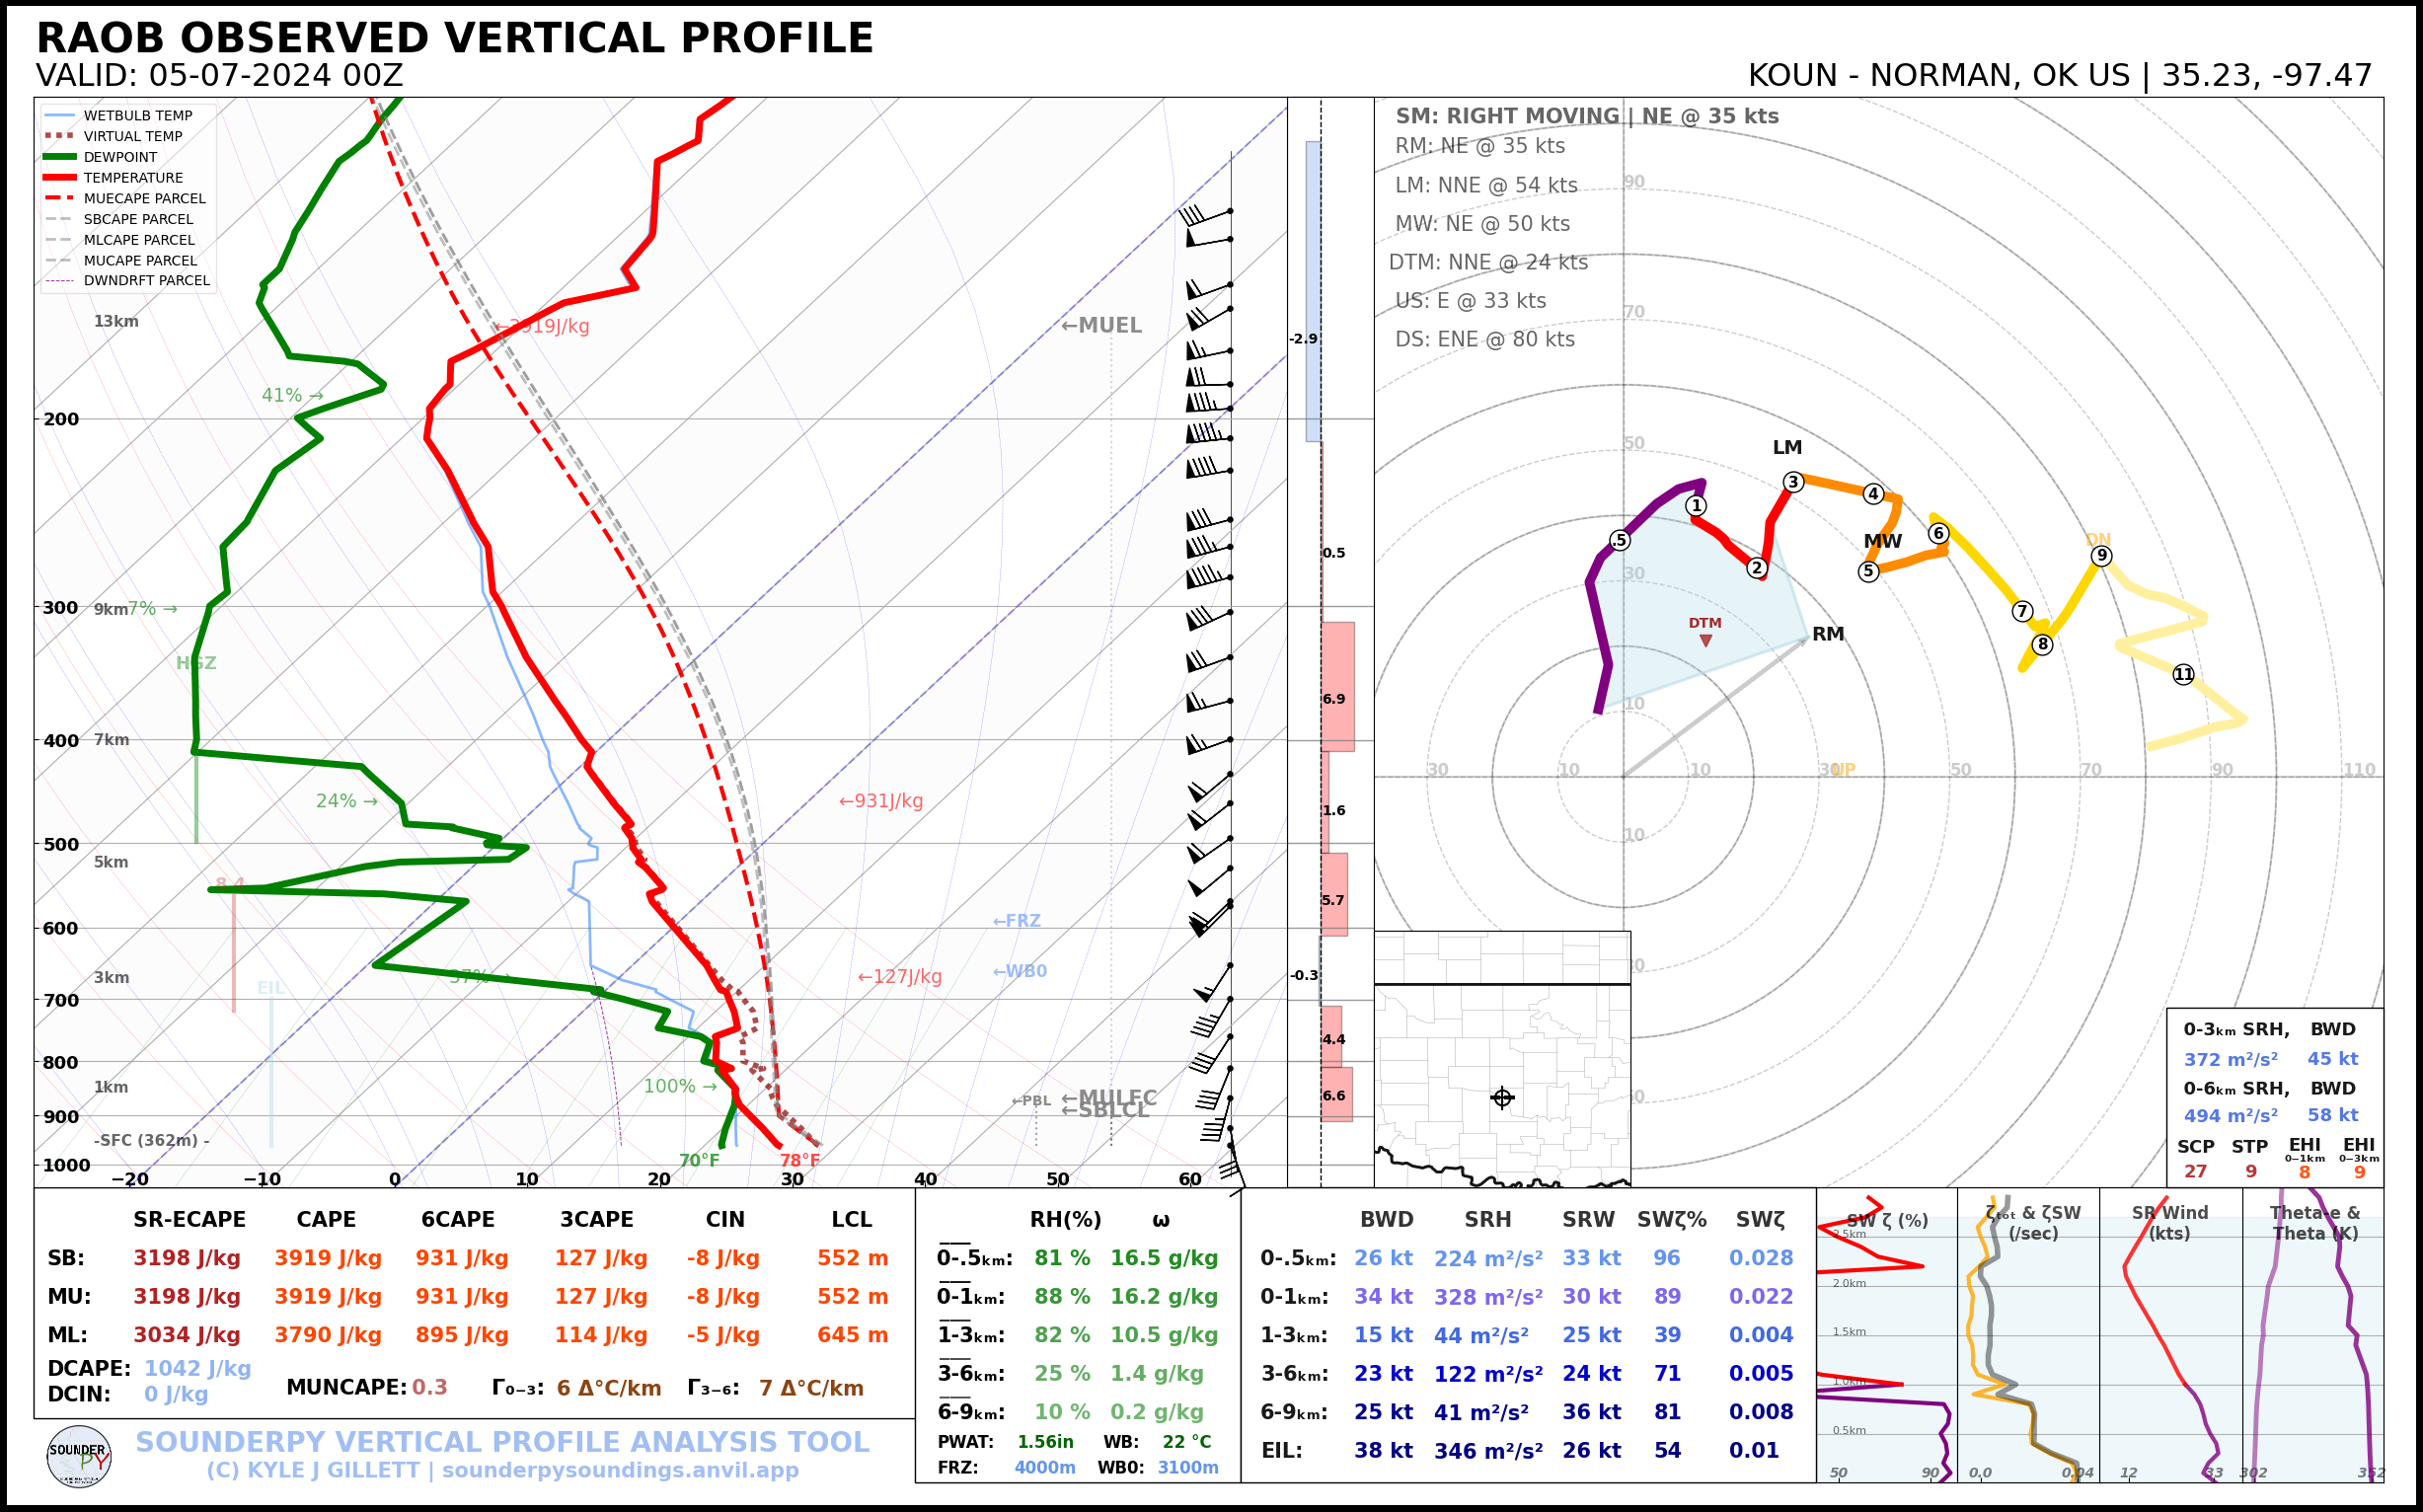

In [8]:
spy.build_sounding(obs_data)

Its as easy as that! Making the plot above can be done with just *two lines* of code!!

<br>
<br>

#### **Customizing sounding figures**

- The SounderPy full-sounding figure has a number of customization options that put the user in control, below we will investigate a few of the more basic ones that, like an extra pinch of salt, can really just add to the overall recipe.

- SounderPy's documentation has a complete discussion on what you can do to these figures: https://kylejgillett.github.io/sounderpy/plottingdata.html#building-soundings

- In this recipe, we will focus on `dark_mode`, `color_blind`, `map_zoom`, and we'll touch on the basics of `special_parcels`
  - These "settings" are more formally called "key-word-arguments" (or kwargs) in programming. These kwargs tell the tool how to behave.

  <br>
  <br>

#### Setting #1: `special_parcels`

- Lets start with `special_parcels`. By default, this kwarg is set to `True`, meaning the "setting is set to on". This is most of what's causing the plot building to be a little slow.

- This setting allows users to plot special parcel paths using Pseudoadiabatic or Irreversible Adiabatic, and Entraining or non-entraining parcels. Its a complex process and a little slow. We wont get too much into the weeds here on what all this means. You can read more here: https://kylejgillett.github.io/sounderpy/plottingdata.html#parcel-logic

- For now, we can set this kwarg to `'simple'` which will only process and plot basic MU/ML/SB parcel paths.

<br>

#### Build a sounding figure with `special_parcels='simple'` using our reanalysis data object

> SOUNDING PLOTTER FUNCTION
  ---------------------------------
- no radar data available -
    > COMPLETE --------
    > RUNTIME: 00:00:03


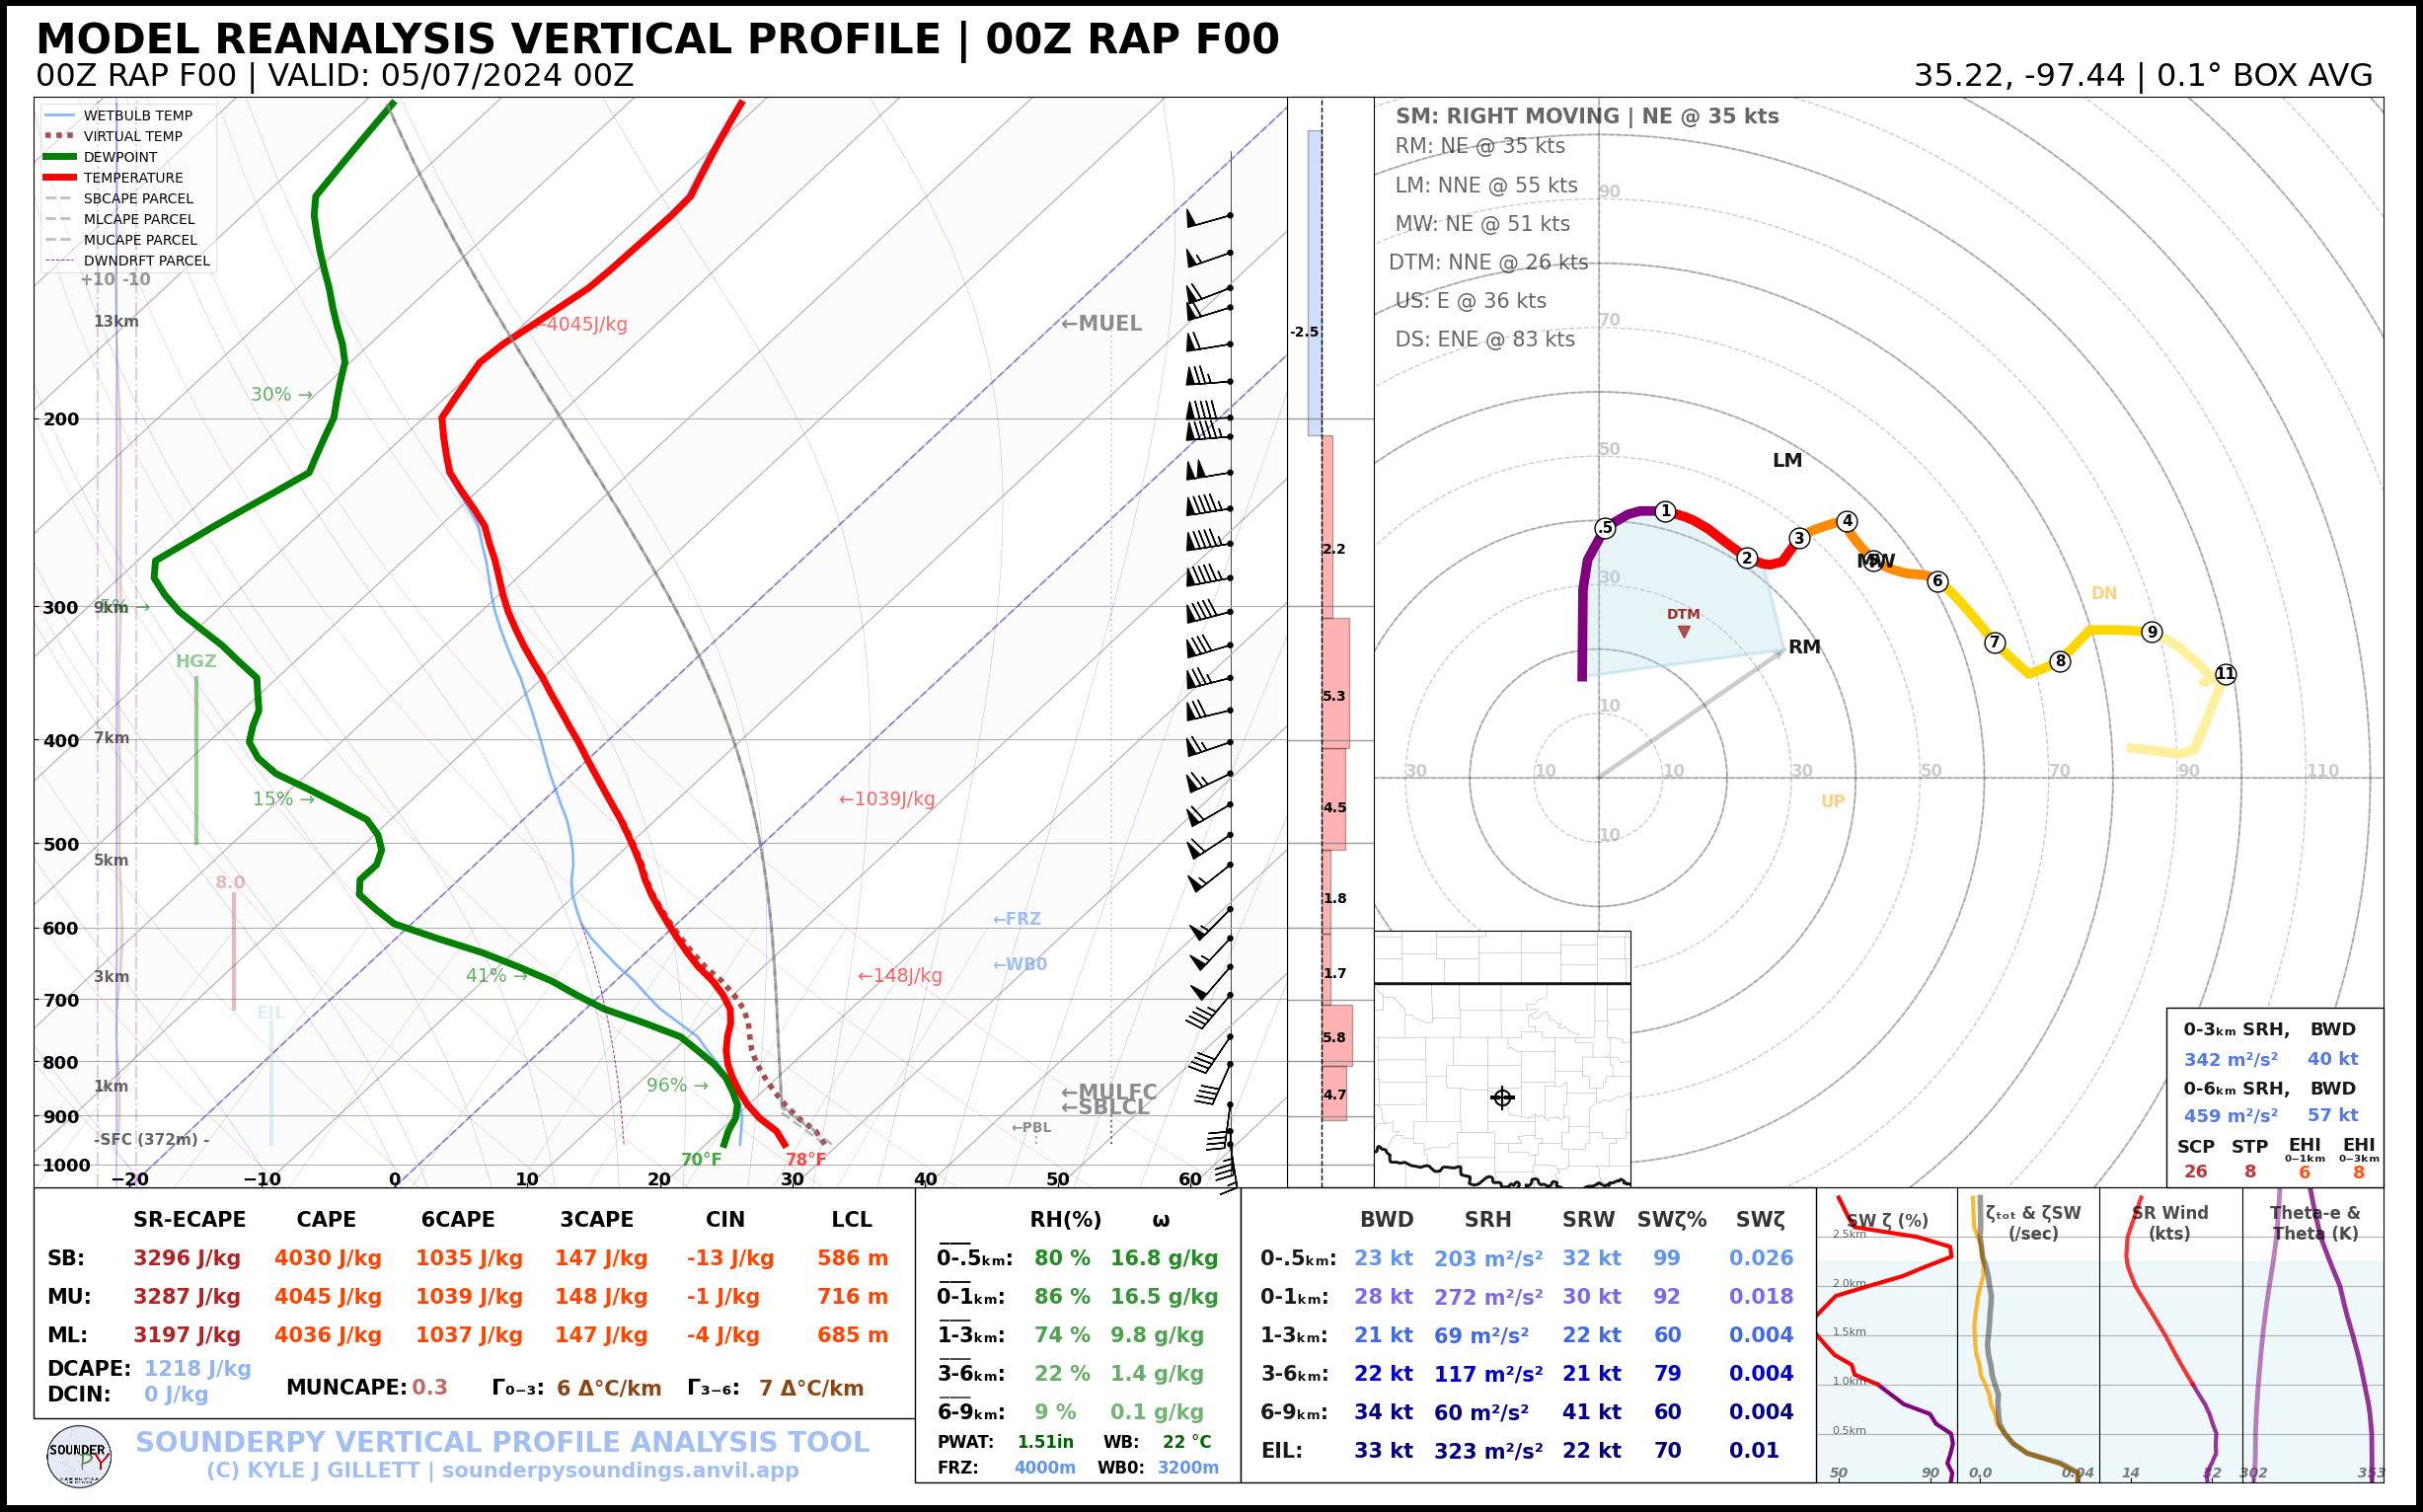

In [9]:
spy.build_sounding(reanl_data, special_parcels='simple')

Much faster!

<br>

#### Setting #2: `map_zoom`

- Now we can check out `map_zoom`, which allows users to change how 'zoomed out' or in the map is, or turn it off all together. This kwarg takes a number called a "zoom factor", in SounderPy slang. By default the zoom factor is = `2`. A higher number reveals more of the map (zooms out). If `map_zoom=0`, the map will be hidden and the code will run even faster.

<br>

#### Build a sounding figure with a zoomed-out map using our BUFKIT forecast data object

> SOUNDING PLOTTER FUNCTION
  ---------------------------------
- no radar data available -
    > COMPLETE --------
    > RUNTIME: 00:00:03


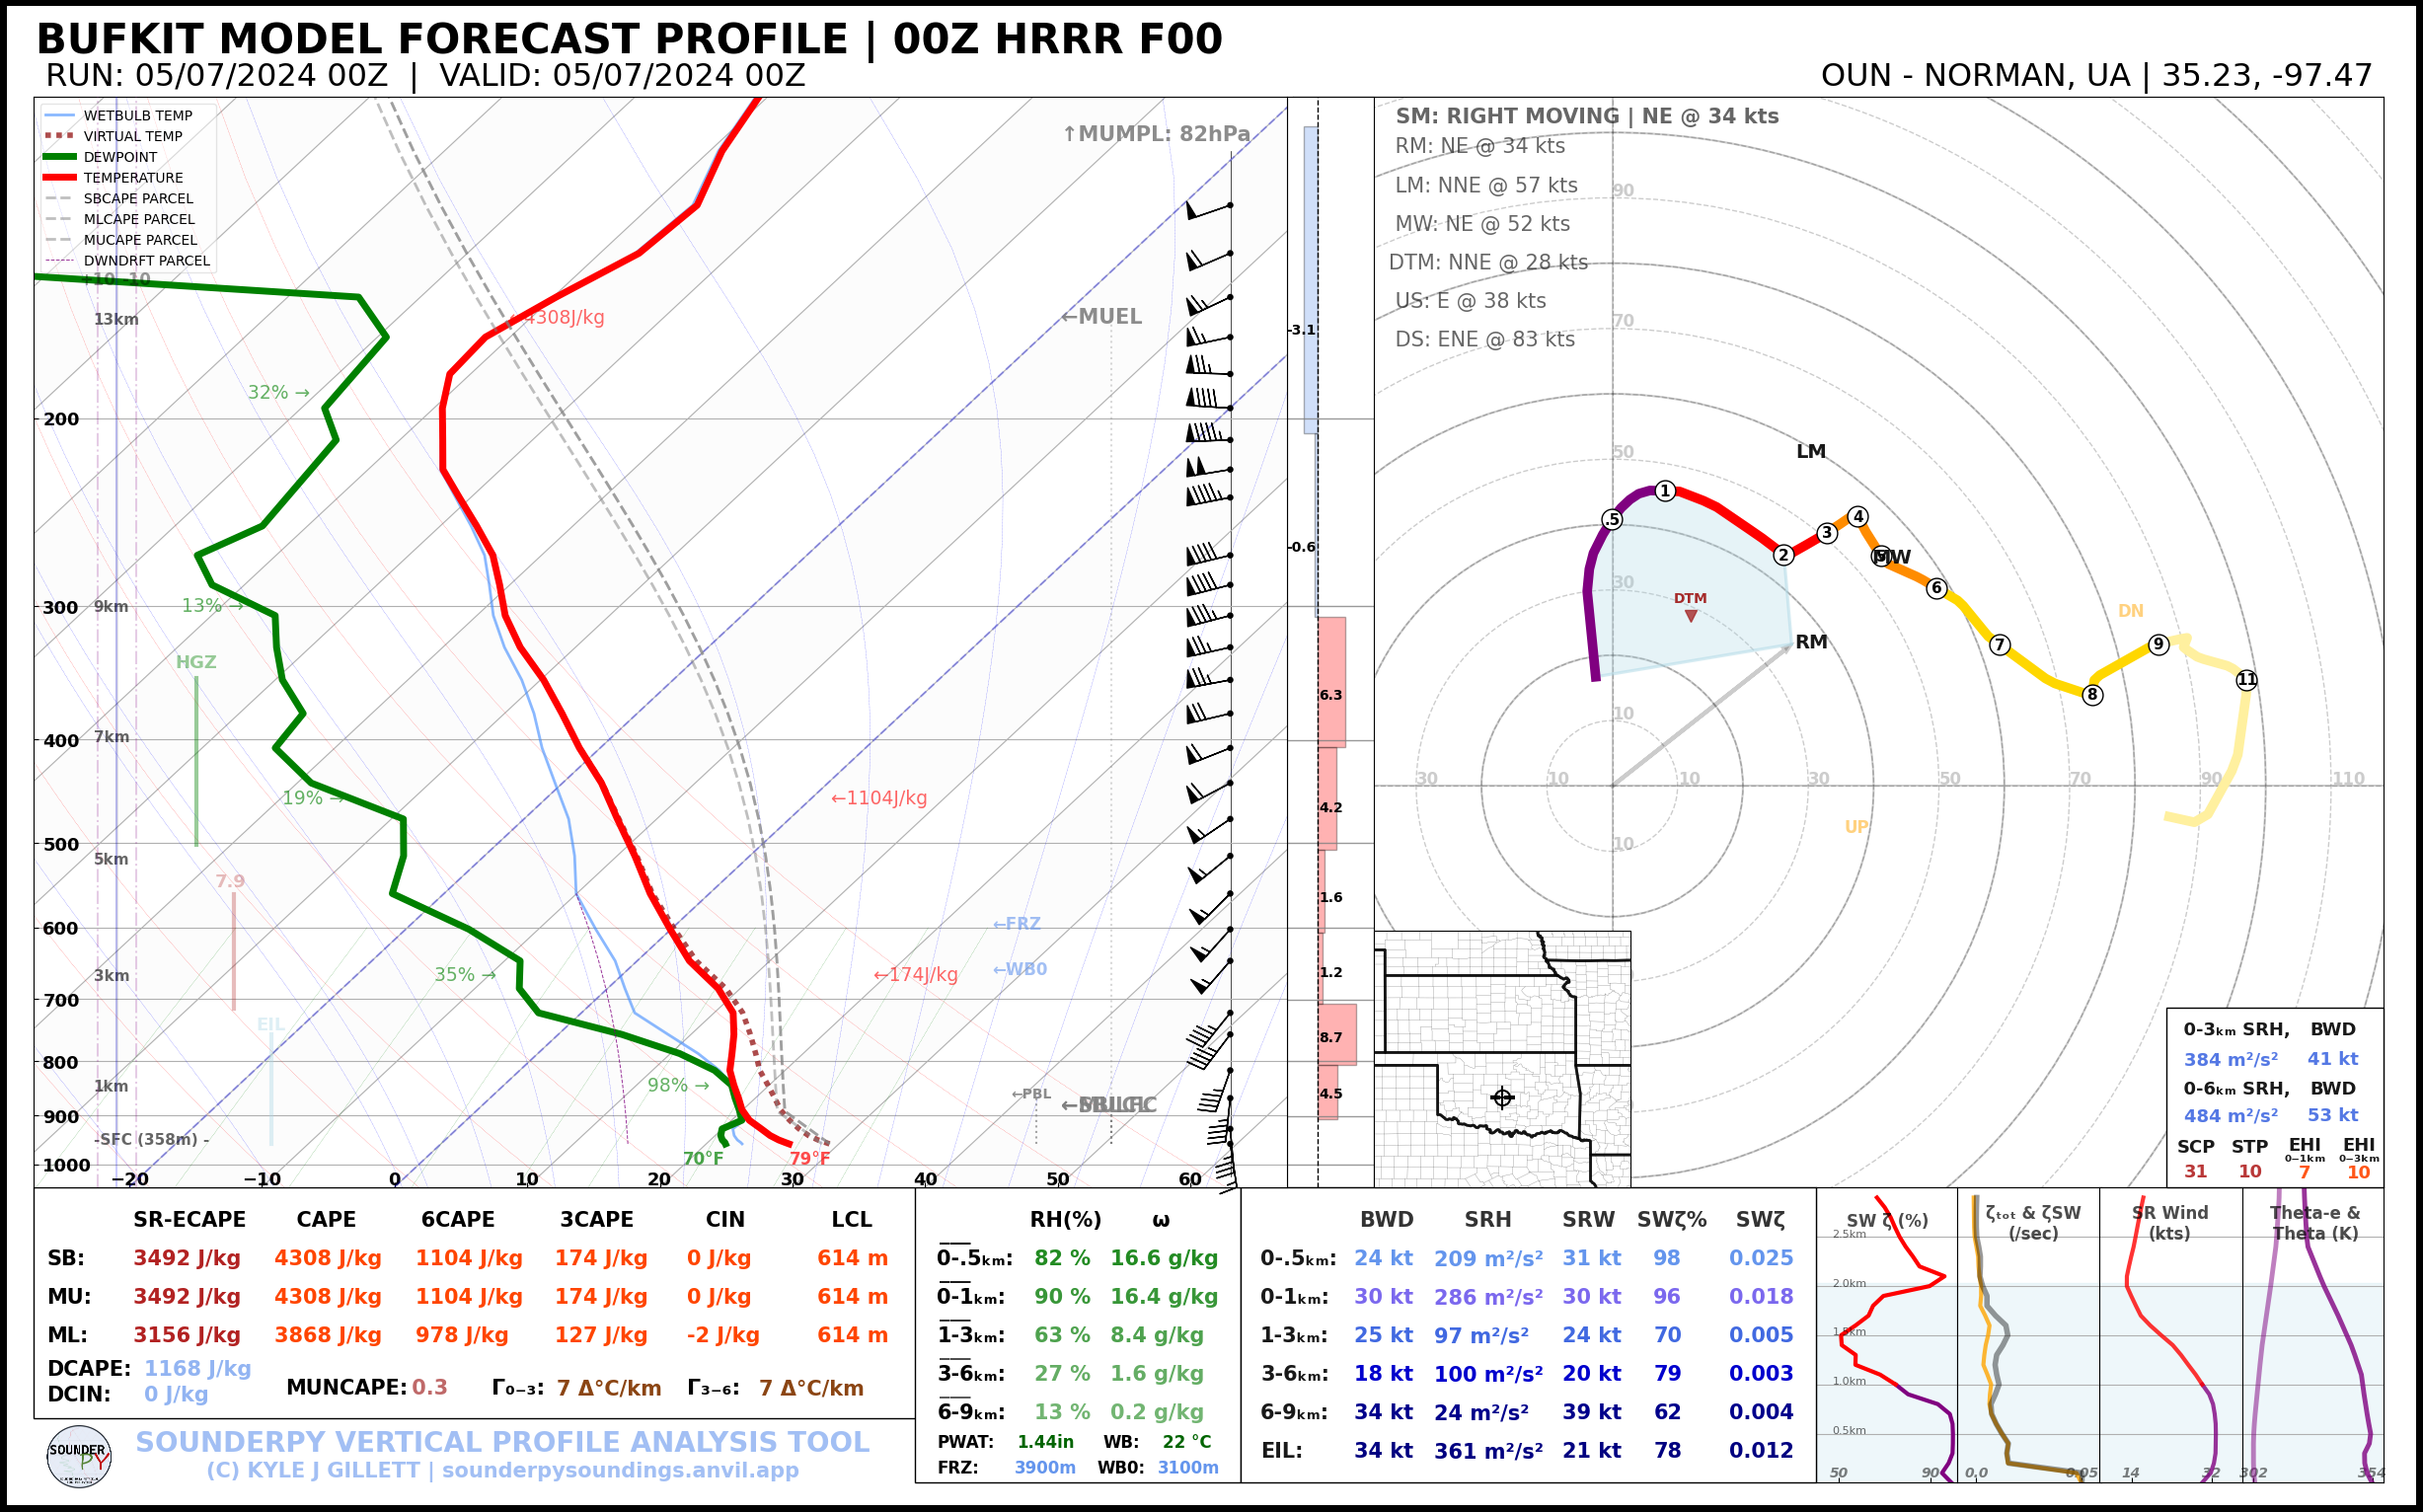

In [10]:
spy.build_sounding(bufkit_data, special_parcels='simple', map_zoom=5)

Neat!

<br>

#### Setting #3: `color_blind`

- Convention for Skew-T plots has always been a red temperature trace and a green dewpoint trace -- this is not an ideal way to plot two side-by-side variables for colorblind or color deficient users and readers. As such, SounderPy offers the `color_blind` setting which changes the dewpoint trace color to blue.


#### Setting #4: `dark_mode`

- Its 2024, everyone loves dark-mode everything. So, SounderPy offers a setting that sets the entire figure to 'dark-mode'.

<br>

#### Build a dark-mode sounding with colorblind settings on using our observations again

> SOUNDING PLOTTER FUNCTION
  ---------------------------------
- no radar data available -
    > COMPLETE --------
    > RUNTIME: 00:00:03


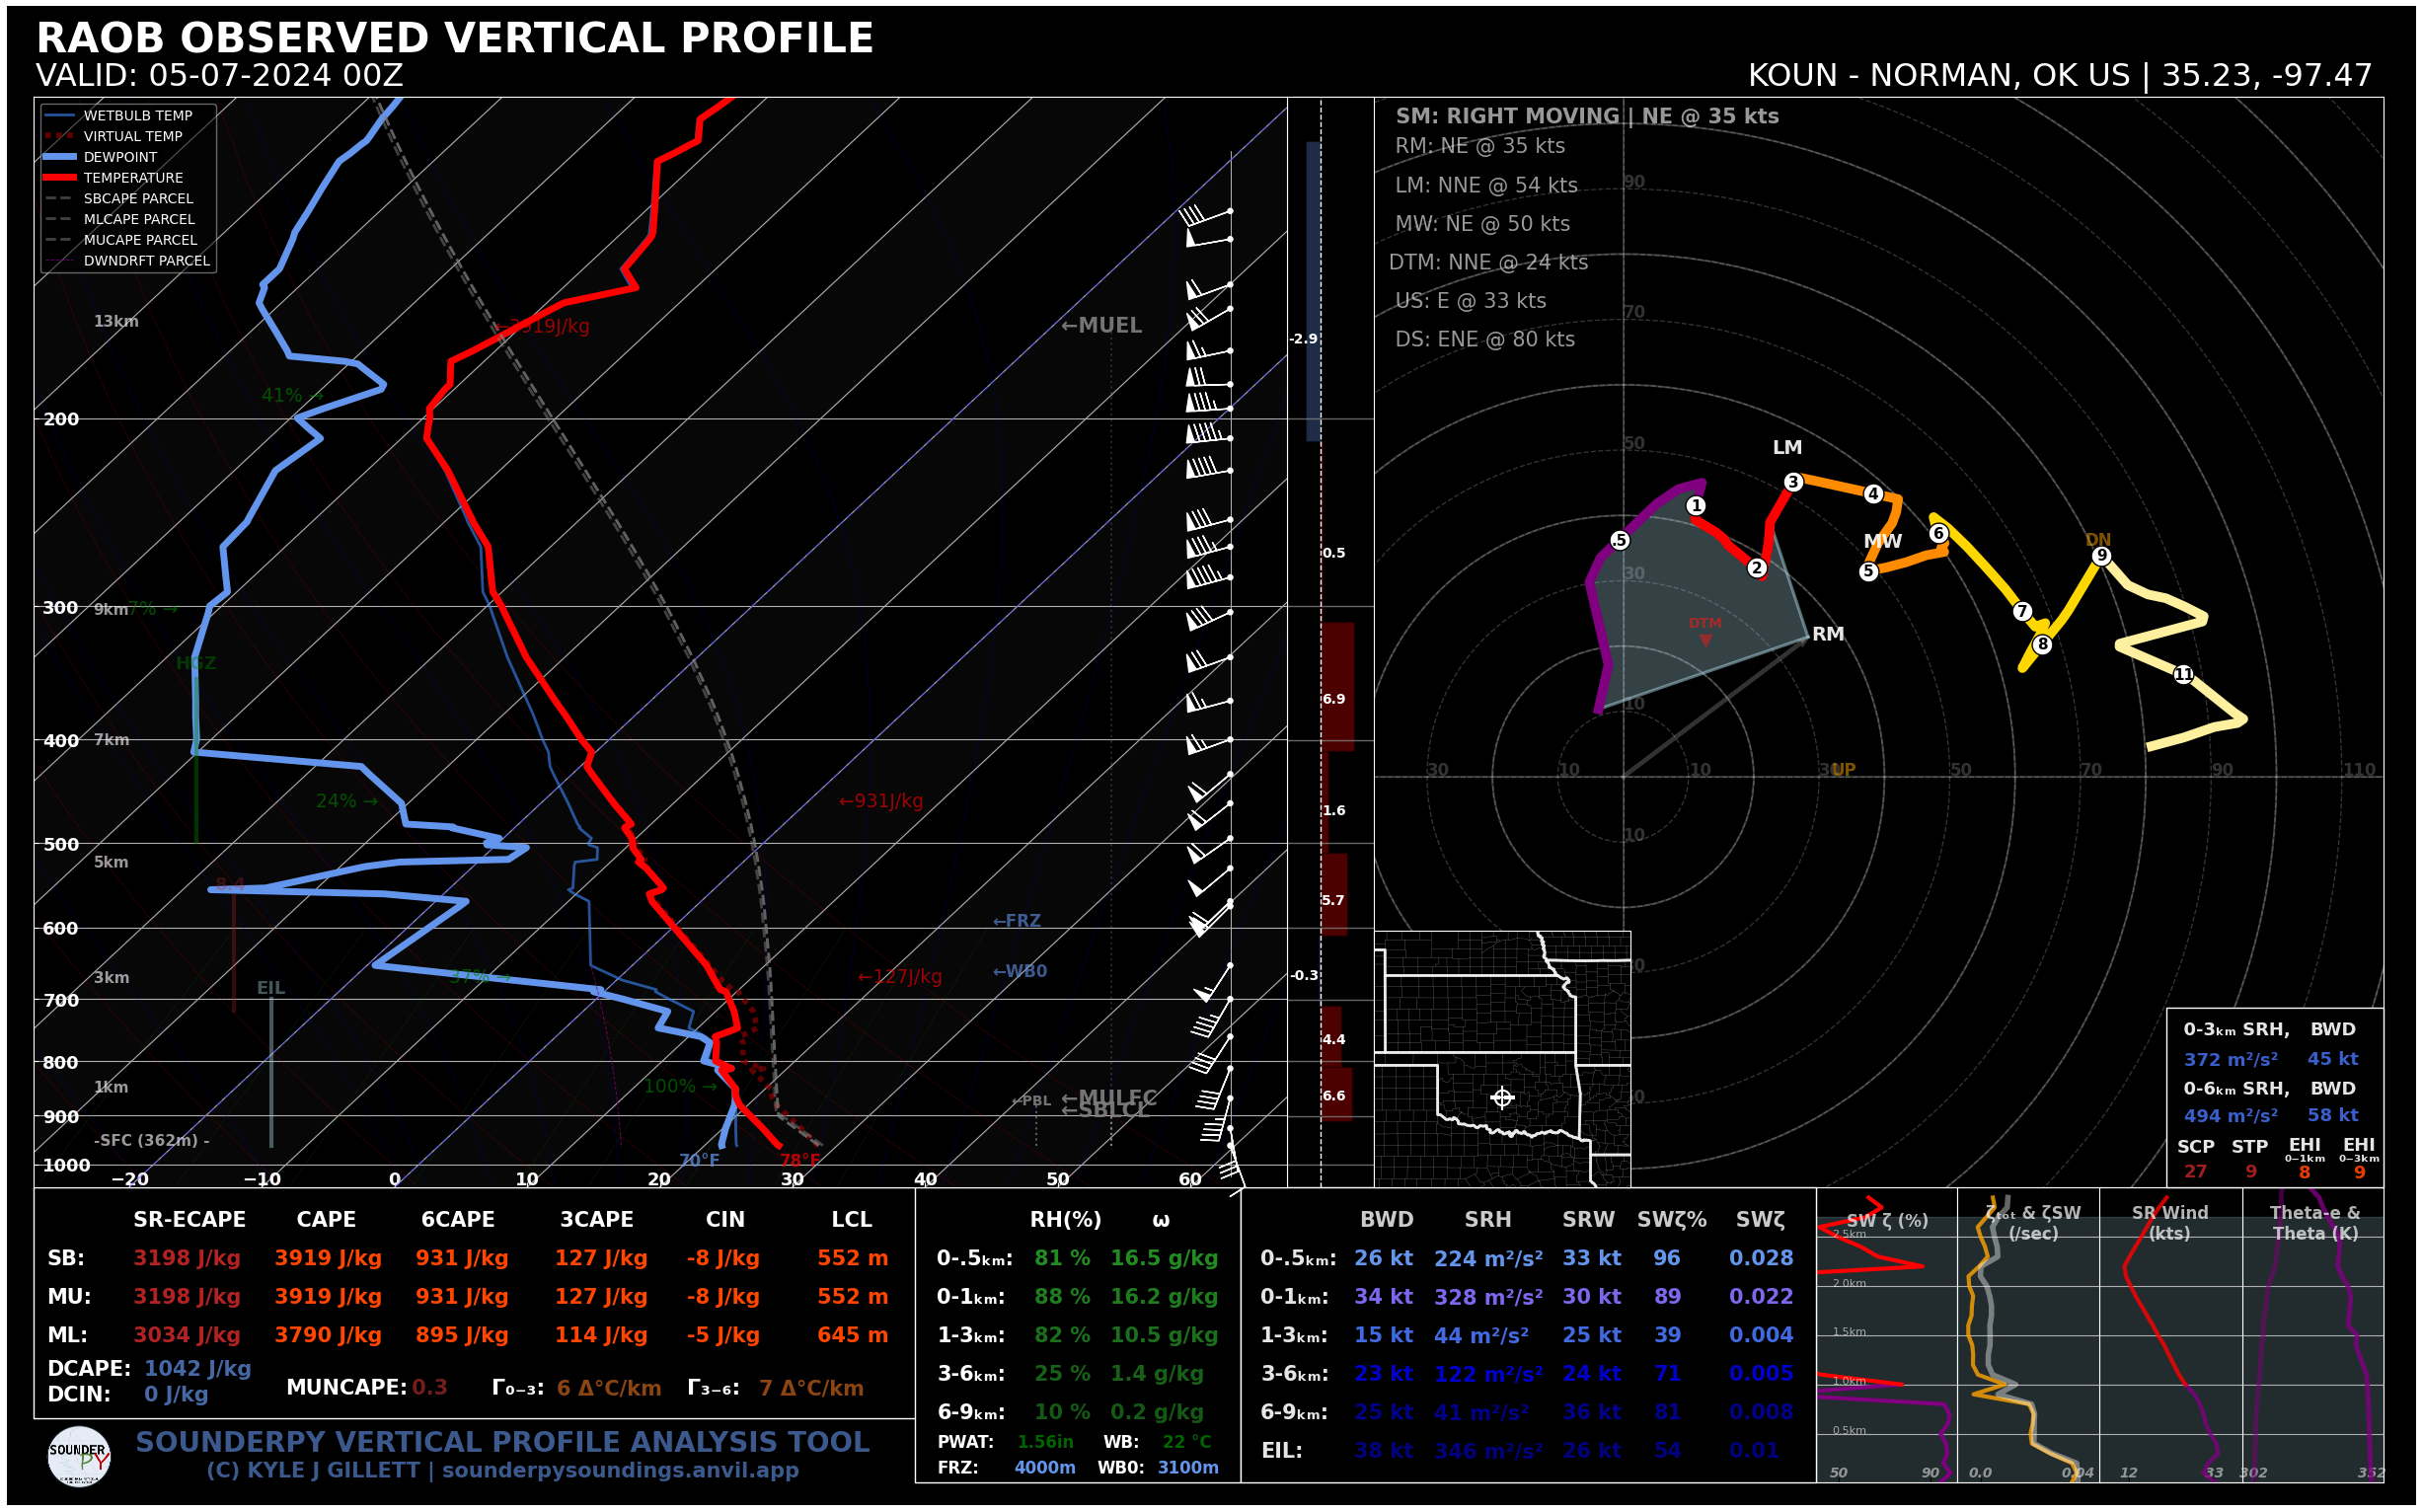

In [11]:
spy.build_sounding(obs_data, special_parcels='simple', map_zoom=5, color_blind=True, dark_mode=True)

**************************
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>


**************************

## **RECIPE 3**: Plotting hodographs

#### **Objectives**
  1. Learn how to build and customize hodograph figures

<br>


- To accomplish this task, we use the `.build_hodograph('clean_data')` tool.
  - where `clean_data` is the data object we want to plot.

- Settings for hodograph figures also includes `dark_mode` and `sr_hodo`


#### Build a hodograph plot using our reanalysis data

> HODOGRAPH PLOTTER FUNCTION --
-------------------------------
> RUNTIME: 00:00:02


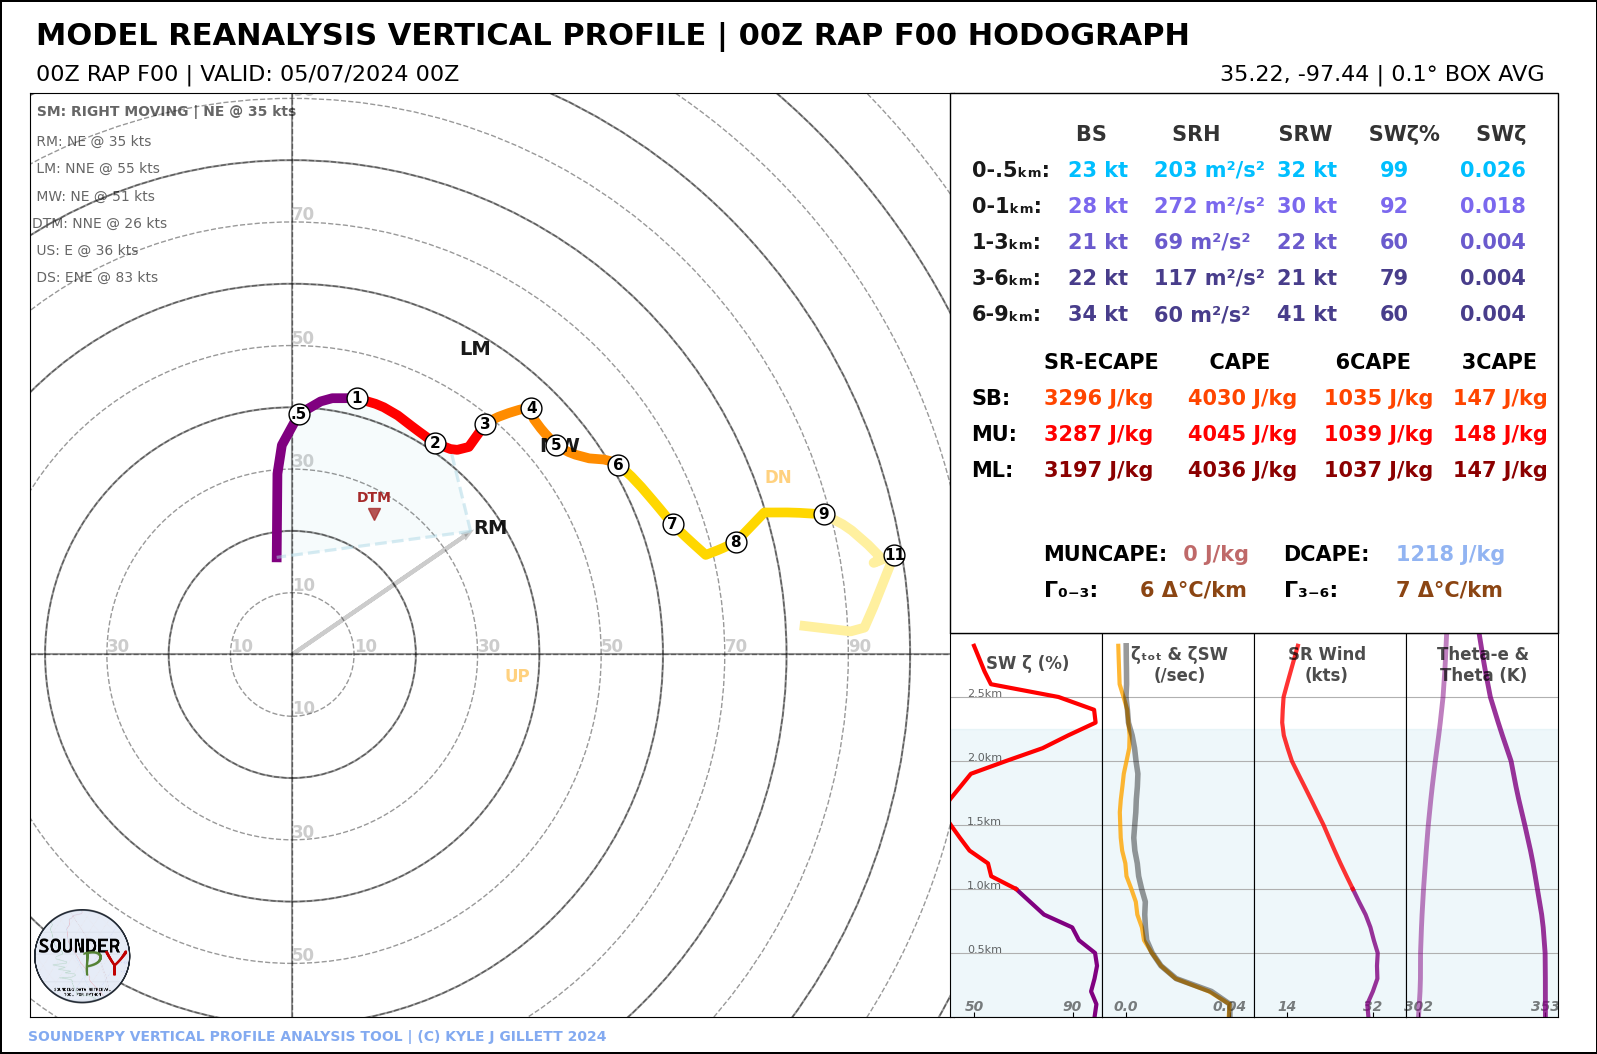

In [12]:
spy.build_hodograph(reanl_data)

Cool!

<br>

#### Hodograph settings: `dark_mode` & `sr_hodo`

- The `dark_mode` kwarg works the same for the hodograph figure as it does for the sounding figure.
- `sr_hodo` allows the user to "reorient the hodograph" into a "storm motion perspective". This will set the storm motion at the origin of the hodograph. A storm relative hodograph...

> “normalizes all of the seemingly-infinite hodograph shapes into what the supercell actually experiences”
~ Cameron J Nixon.



<br>

#### Build a storm-relative dark-mode hodograph figure using our BUFKIT forecast data


> HODOGRAPH PLOTTER FUNCTION --
-------------------------------
> RUNTIME: 00:00:02


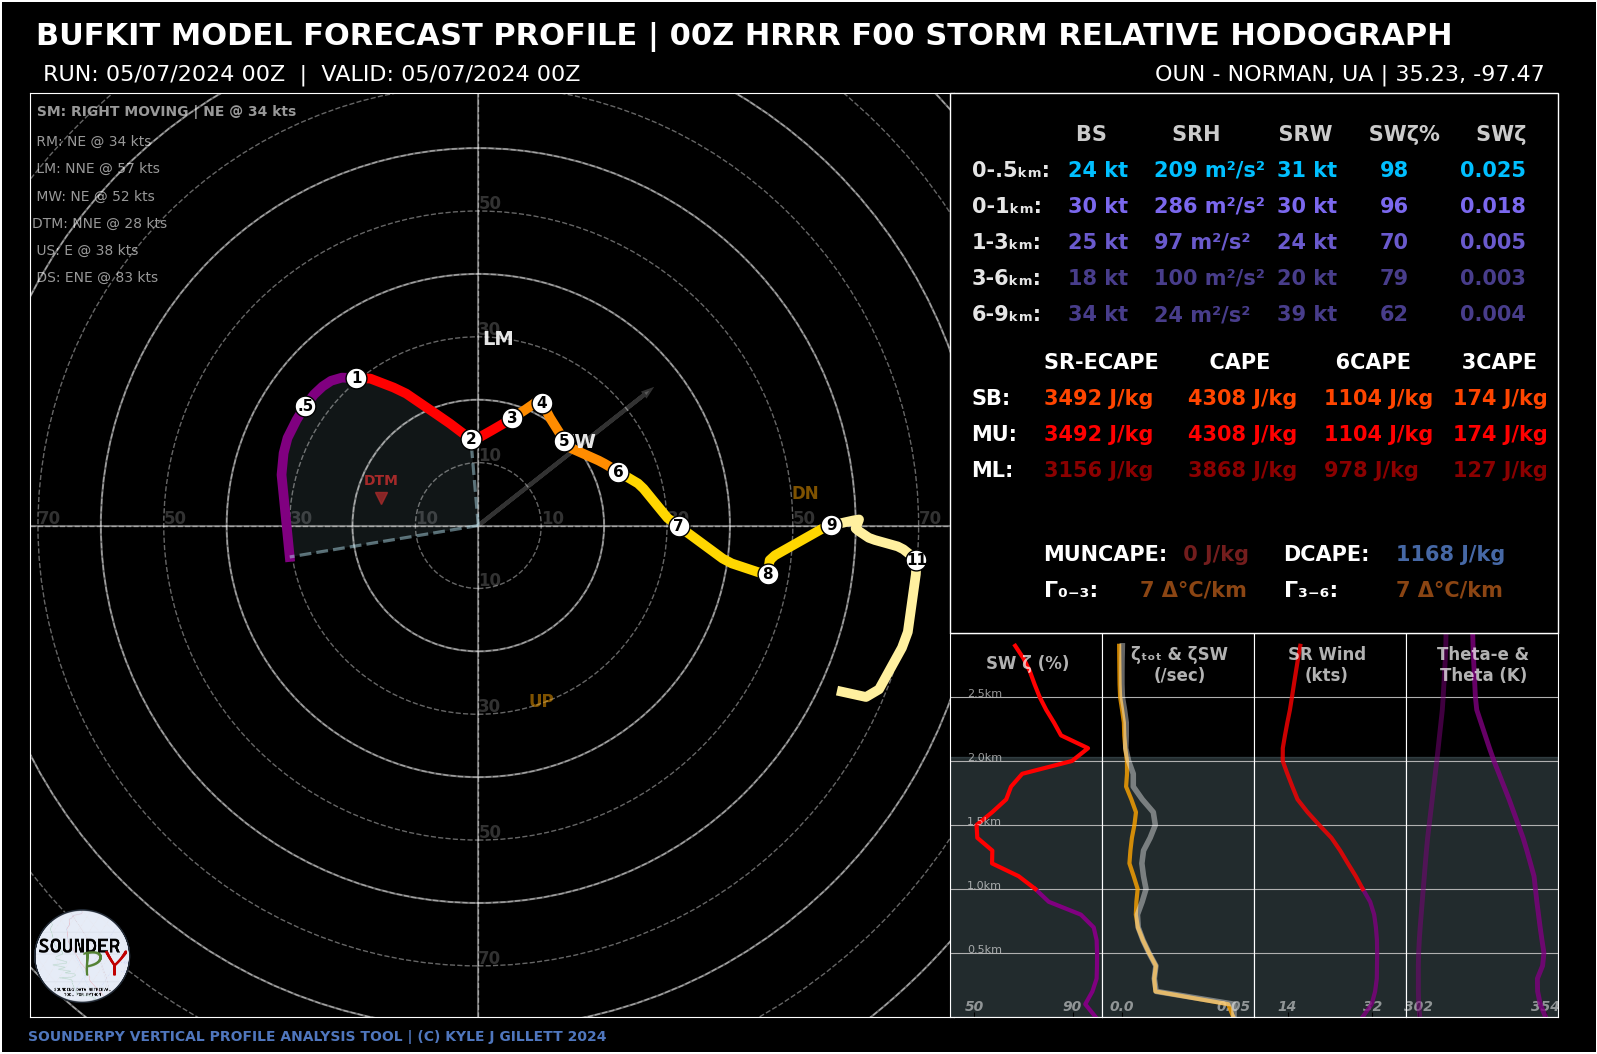

In [13]:
spy.build_hodograph(bufkit_data, dark_mode=True, sr_hodo=True)

**************************
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>


**************************

## **RECIPE 4**: Plotting sounding composites

#### **Objectives**
  1. Learn how to build and customize composite sounding figures using a few basic settings

<br>

**Motivation**: There are generally 2 downsides to sounding data analysis:
  1. Soundings represent a single time and point in space.
  2. Soundings can be very hard to compare to one another (in time, or in reference to the past, analogs, etc), and in meteorology, **context is key**.

<br>

These issues can be alleviated using SounderPy's `.build_composite(data_list)` tool.
  - where `data_list` is a Python list of SounderPy data objects.

<br>

Some custom settings include...
- `colors_to_use`: a list of color names, matching the size of `data_list` **OR** `cmap`: the colormap used to plot profiles. The colors of each profile.
- `lw_to_use`: a list of linewidths, matching the size of `data_list`. The linewidth of ech profile.
- `ls_to_use`: a list of matplotlib line styles, matching the size of `data_list`. The line style for each profile.
- `alphas_to_use`: a list of alphas, matching the size of 'data_list`. The alpha of each profile.
- `shade_between`: whether to shade between the dewpoint and temperature traces
- `dark_mode`

<br>

#### Build a dark mode composite sounding with custom colors to compare our observation data, reanalysis model data, and forecast model data, all valid for the same time & location


> COMPOSITE SOUNDING FUNCTION
  -------------------------------
> COMPLETE --------
> RUNTIME: 00:00:00


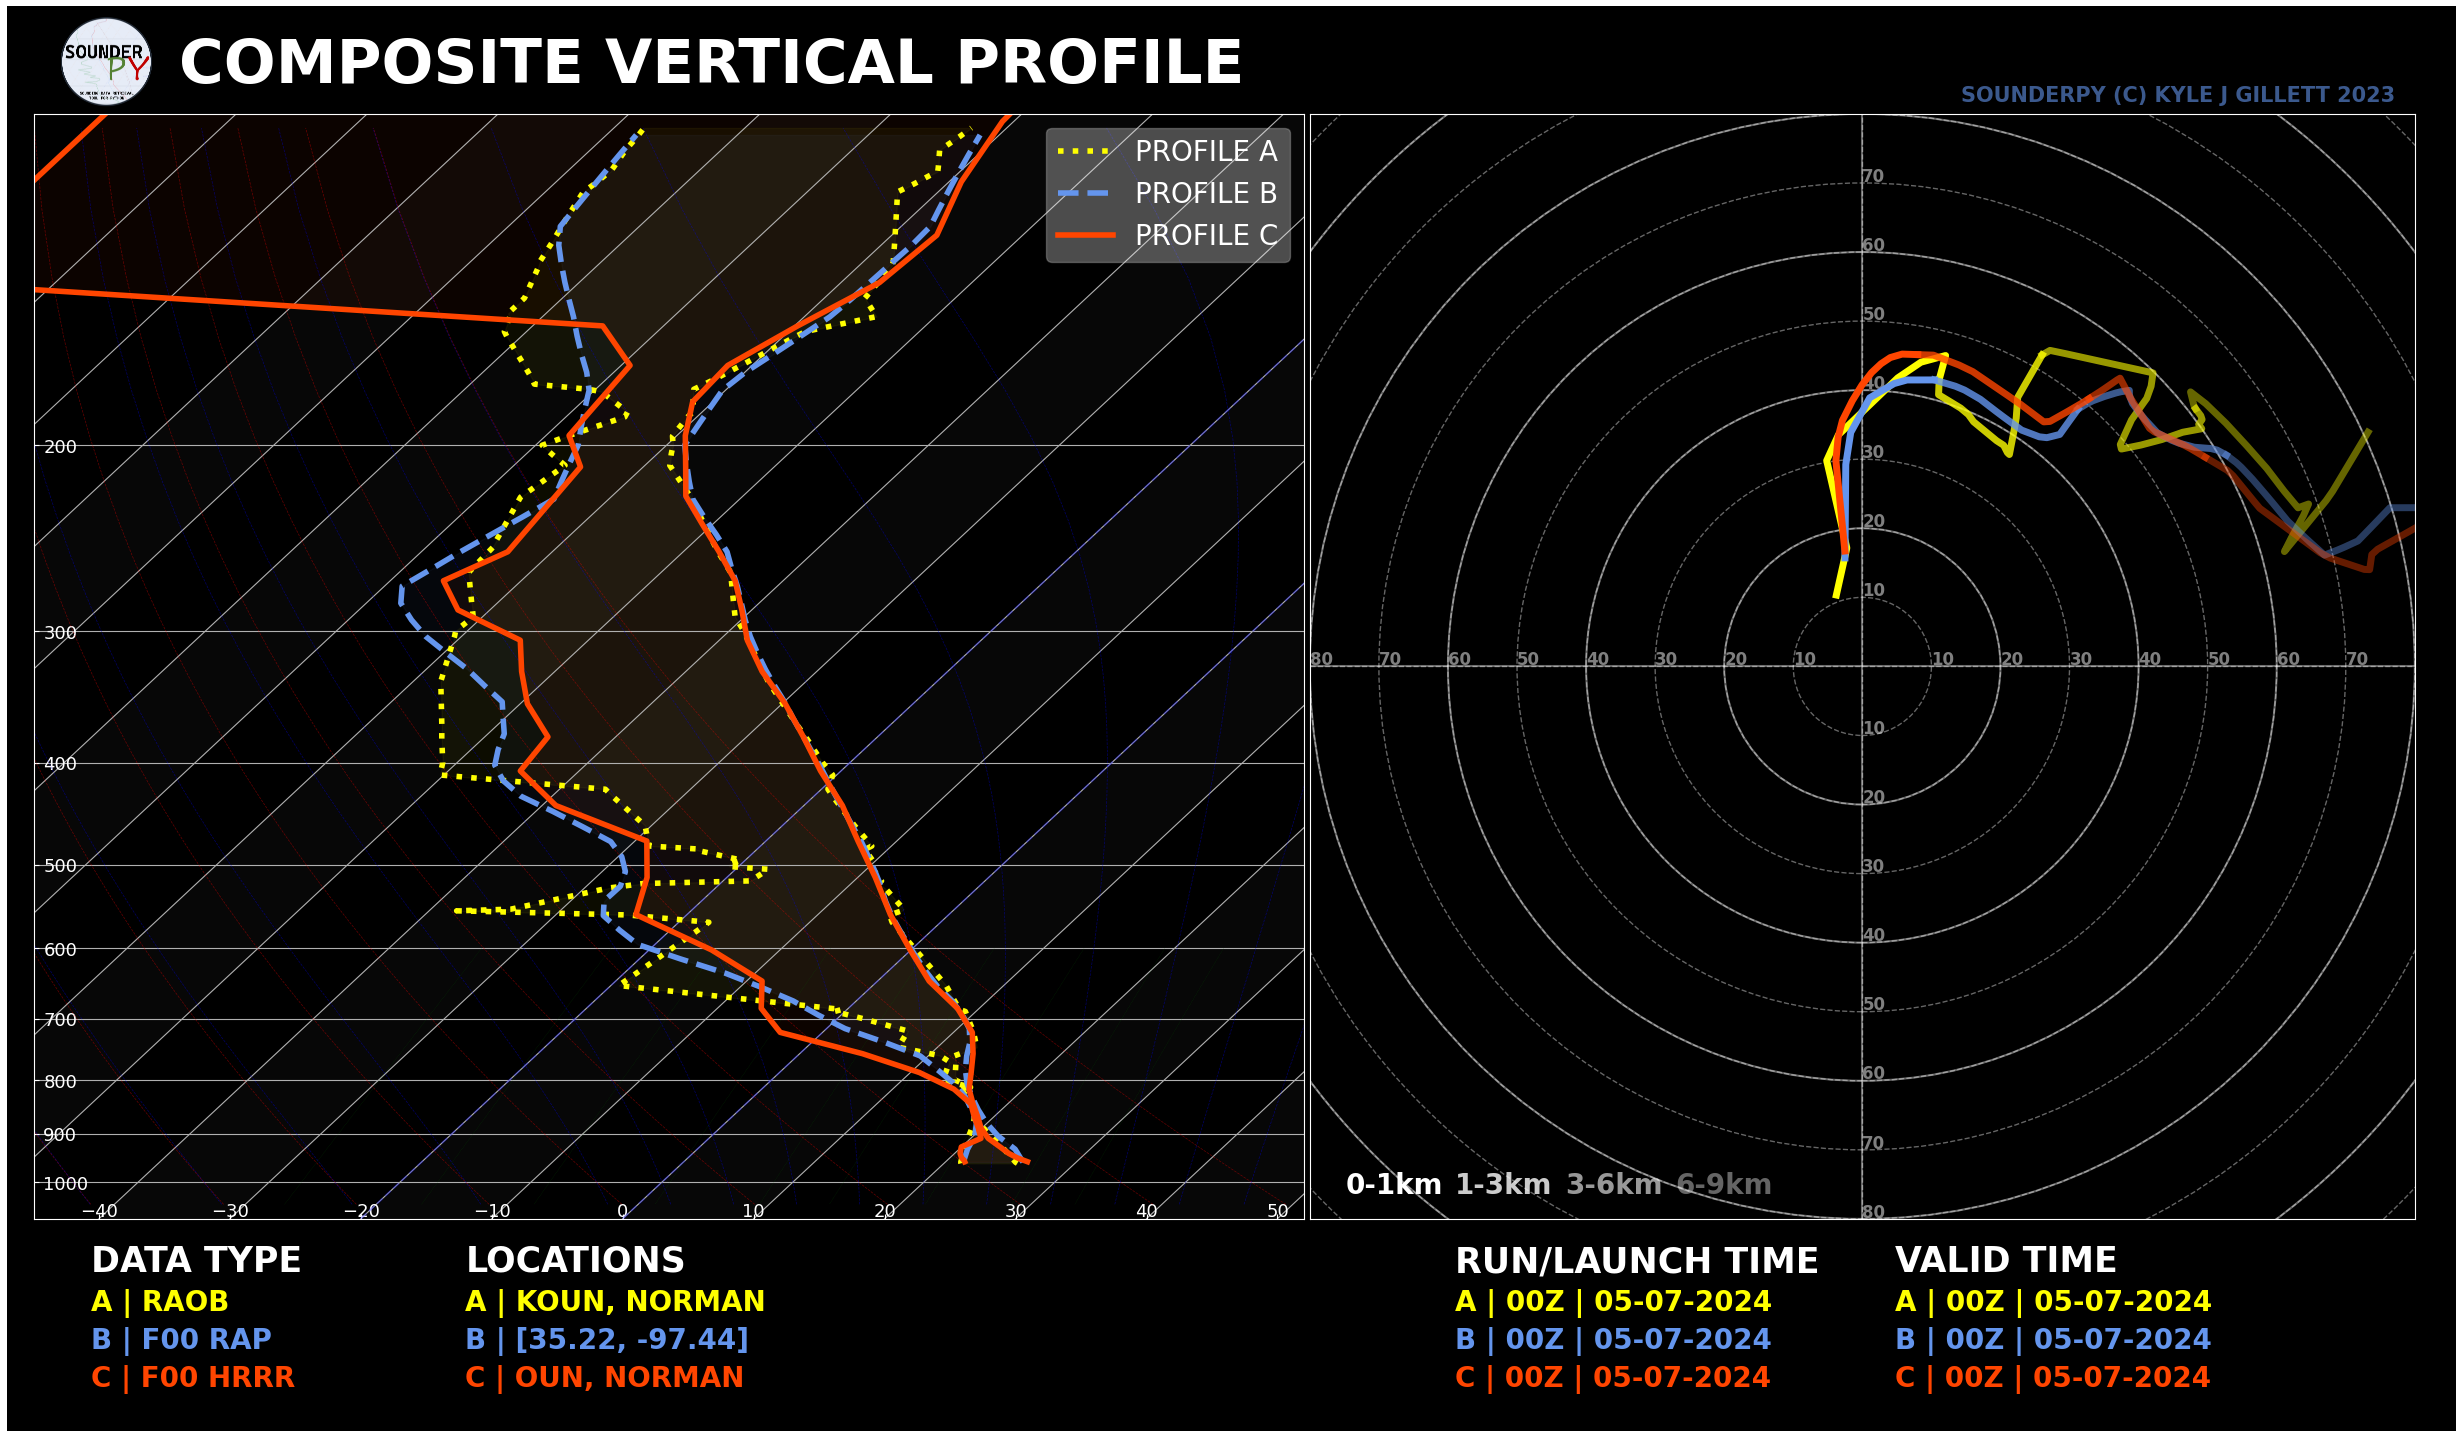

In [14]:
# list of data objects
data_list = [obs_data, reanl_data, bufkit_data]

# colors
colors_to_use = ['yellow', 'cornflowerblue', 'orangered']

# linewidths
# here a list-comprehension trick!
# sets all linewidths to 4
lw_to_use = [4 for data in data_list]

# linestyles
ls_to_use = [':', '--', '-']

# alphas
alphas_to_use = [1 for data in data_list]

spy.build_composite(data_list, colors_to_use=colors_to_use, lw_to_use=lw_to_use,
                    ls_to_use=ls_to_use, alphas_to_use=alphas_to_use, dark_mode=True)


******************

<br>
<br>
<br>
<br>

### **Congrats!** You finished this Beginners SounderPy Cookbook!

Want to learn more and do more with SounderPy? Check out the documentation and examples incuded here: https://kylejgillett.github.io/sounderpy/index.html